In [1]:
import silq
silq.initialize("EWJN", mode='analysis')
%matplotlib notebook

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


In [2]:
T1_msmts = [T1_Measurement(B0=4,   location='2016-09-11/#014_T1_data_01-49-04'),
            T1_Measurement(B0=4.5, location='2016-09-10/#004_T1_data_00-08-32'),
            T1_Measurement(B0=5,   location='2016-09-10/#017_T1_data_13-39-35'),
            T1_Measurement(B0=3.5, location='2016-09-08/#003_T1_data_09-57-29'),
            T1_Measurement(B0=3,   location='2016-09-06/#013_T1_data_20-53-43'),
            T1_Measurement(B0=2.5,   location='2016-09-12/#012_T1_data_18-05-27', skip=-1),
            T1_Measurement(B0=2,   location='2016-09-13/#010_T1_data_13-46-56', skip=-1),
            T1_Measurement(B0=1.5,   location='2016-09-14/#034_T1_data_17-13-07'),
            T1_Measurement(B0=1.4,   location='2016-09-15/#012_T1_data_14-52-32'),
            T1_Measurement(B0=1.2,   location='2016-09-16/#011_T1_data_13-04-18'),
            T1_Measurement(B0=1,   location='2016-09-17/#012_T1_data_12-42-07'),
            T1_Measurement(B0=0.8,   location='2016-09-18/#010_T1_data_13-54-44'),
            T1_Measurement(B0=0.6,   location='2016-09-19/#022_T1_data_15-52-22')]

T1_msmts = {T1_msmt.B0: T1_msmt for T1_msmt in T1_msmts}



B0_fields = np.array(list(T1_msmts.keys()))
idx_sorted = np.argsort(B0_fields)
B0_fields = B0_fields[idx_sorted]
T1_values = np.array([T1_msmts[B0].T1 for B0 in B0_fields])
T1_std = np.array([T1_msmts[B0].T1_std for B0 in B0_fields])
T1_rates = 1/T1_values


Number of successful sweeps: 21
Number of successful sweeps: 30
Number of successful sweeps: 30
Number of successful sweeps: 13
Number of successful sweeps: 20
Number of successful sweeps: 14
Number of successful sweeps: 17
Number of successful sweeps: 11
Number of successful sweeps: 12
Number of successful sweeps: 14
Number of successful sweeps: 15
Number of successful sweeps: 14
Number of successful sweeps: 12


In [3]:
import lmfit
def B5_polynomial(x, amplitude, offset):
    return amplitude*x**5 + offset

B5_model = lmfit.Model(B5_polynomial)
parameters=lmfit.Parameters()
parameters.add('amplitude', 1e-6)
parameters.add('offset', 3*10**-4, vary=False)
B5_fit_result = B5_model.fit(T1_rates, x=B0_fields, params=parameters)
B5_fit_result.best_values

{'amplitude': 8.6784920502630922e-07, 'offset': 0.00030000000000000003}

In [4]:
import lmfit
def B_polynomial(x, exponent, amplitude, offset):
    return amplitude*x**exponent + offset

B_model = lmfit.Model(B_polynomial)
parameters=lmfit.Parameters()
parameters.add('exponent', 2)
parameters.add('amplitude', 1e-4)
parameters.add('offset', 0)
B_fit_result = B_model.fit(T1_rates, x=B0_fields, params=parameters)
B_fit_result.best_values

{'amplitude': 2.7501350300065915e-05,
 'exponent': 2.7786120749963334,
 'offset': 0.00027132511244249189}

<IPython.core.display.Javascript object>


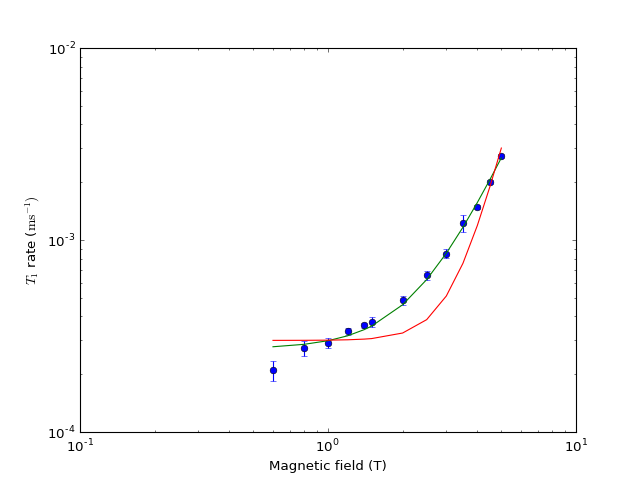

In [5]:
fig, ax = plt.subplots(1,1)
ax.errorbar(B0_fields, T1_rates, yerr=T1_std / T1_values * T1_rates, marker='o', linestyle='')
ax.plot(B0_fields, B_fit_result.best_fit, '-')
ax.plot(B0_fields, B5_fit_result.best_fit, '-')
# ax.plot(B0_fields, 1e-4*B0_fields**2.1, '-')

ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(.7, 5.5)
# xticks = [.7,1,1.5,2,3,4,5,6]
# ax.set_xticks(xticks)
# ax.set_xticklabels(xticks)

ax.set_xlabel('Magnetic field (T)')
ax.set_ylabel(r'$T_1$ rate ($\mathrm{ms}^{-1})$')

<IPython.core.display.Javascript object>


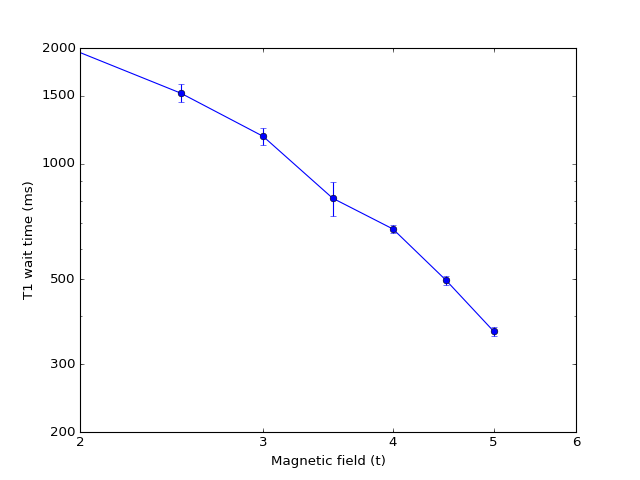

In [21]:
fig, ax = plt.subplots(1,1)
ax.errorbar(B0_fields, T1_values, yerr=T1_std, marker='o', linestyle='-')
# ax.plot(B0_fields, B5_fit_result.best_fit, '-')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(2, 5.2)
ax.set_ylim(0, 2000)
ax.set_xticks([2,3,4,5,6])
ax.set_xticklabels([2,3,4,5,6])
yticks = [200,300,500,1000,1500, 2000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xlabel('Magnetic field (t)')
ax.set_ylabel('T1 wait time (ms)')